<a href="https://colab.research.google.com/github/Vinsmoke-R/demo-baka/blob/main/Punjab_bus_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

shape: (2364, 8)
columns: ['route_id', 'trip_id', 'day_of_week', 'hour', 'stop_id', 'boardings', 'alightings', 'overall']
unique counts:
 route_id        5
trip_id         5
day_of_week     7
stop_id        10
dtype: int64

Target (overall) summary:
 count    2364.000000
mean       36.826988
std        19.257485
min         0.000000
25%        22.000000
50%        34.000000
75%        49.000000
max       119.000000
Name: overall, dtype: float64


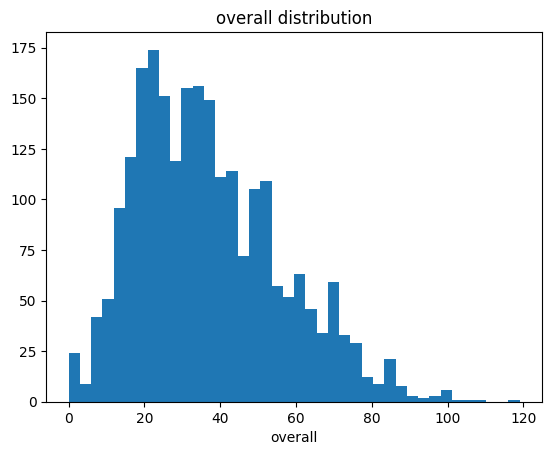

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("bus_demand_corrected.csv")
print("shape:", df.shape)
print("columns:", df.columns.tolist())
print("unique counts:\n", df[['route_id','trip_id','day_of_week','stop_id']].nunique())
print("\nTarget (overall) summary:\n", df['overall'].describe())

# histogram of target
plt.hist(df['overall'].dropna(), bins=40)
plt.title("overall distribution"); plt.xlabel("overall"); plt.show()


In [2]:
if {'boardings','alightings'}.issubset(df.columns):
    df['sum_ba'] = df['boardings'] + df['alightings']
    leakage_count = (np.isclose(df['sum_ba'], df['overall'])).sum()
    print("rows with boardings+alightings == overall:", leakage_count, "/", len(df))
    # inspect some rows
    print(df.loc[np.isclose(df['sum_ba'], df['overall']), ['boardings','alightings','overall']].head())


rows with boardings+alightings == overall: 97 / 2364
    boardings  alightings  overall
0        44.0         0.0     44.0
3        49.0         0.0     49.0
34        0.0        33.0     33.0
52       38.0         0.0     38.0
55       52.0         0.0     52.0


In [19]:
df.head(52)

,route_id,trip_id,day_of_week,hour,stop_id,boardings,alightings,overall,sum_ba,hour_sin,hour_cos,route_stop,is_weekend
0,ROUTE11,TRIP301,Friday,7,S1,44.0,0.0,44.0,44.0,9.659258e-01,-2.588190e-01,ROUTE11_S1,0
1,ROUTE11,TRIP301,Friday,7,S2,44.0,42.0,46.0,86.0,9.659258e-01,-2.588190e-01,ROUTE11_S2,0
2,ROUTE11,TRIP301,Friday,7,S3,0.0,46.0,0.0,46.0,9.659258e-01,-2.588190e-01,ROUTE11_S3,0
3,ROUTE11,TRIP301,Friday,7,S5,49.0,0.0,49.0,49.0,9.659258e-01,-2.588190e-01,ROUTE11_S5,0
4,ROUTE11,TRIP301,Friday,8,S1,52.0,0.0,101.0,52.0,8.660254e-01,-5.000000e-01,ROUTE11_S1,0
5,ROUTE11,TRIP301,Friday,8,S2,51.0,44.0,108.0,95.0,8.660254e-01,-5.000000e-01,ROUTE11_S2,0
6,ROUTE11,TRIP301,Friday,8,S3,0.0,93.0,15.0,93.0,8.660254e-01,-5.000000e-01,ROUTE11_S3,0
7,ROUTE11,TRIP301,Friday,8,S5,48.0,14.0,49.0,62.0,8.660254e-01,-5.000000e-01,ROUTE11_S5,0
8,ROUTE11,TRIP301,Friday,9,S1,34.0,0.0,83.0,34.0,7.071068e-01,-7.071068e-01,ROUTE11_S1,0
9,ROUTE11,TRIP301,Friday,9,S2,37.0,30.0,90.0,67.0,7.071068e-01,-7.071068e-01,ROUTE11_S2,0


In [4]:
print(df.groupby('trip_id')['route_id'].nunique())
print(df.groupby('trip_id')['stop_id'].nunique().head())


trip_id
TRIP301    1
TRIP302    1
TRIP303    1
TRIP304    1
TRIP305    1
Name: route_id, dtype: int64
trip_id
TRIP301    4
TRIP302    4
TRIP303    6
TRIP304    6
TRIP305    6
Name: stop_id, dtype: int64


In [5]:
# cyclical hour
df['hour_sin'] = np.sin(2*np.pi*df['hour']/24)
df['hour_cos'] = np.cos(2*np.pi*df['hour']/24)

# route-stop combined (low cardinality: 5*10 = 50)
df['route_stop'] = df['route_id'].astype(str) + '_' + df['stop_id'].astype(str)

# is_weekend should already exist; otherwise create from day_of_week
if 'is_weekend' not in df.columns:
    df['is_weekend'] = df['day_of_week'].isin(['Saturday','Sunday']).astype(int)


In [6]:
df

,route_id,trip_id,day_of_week,hour,stop_id,boardings,alightings,overall,sum_ba,hour_sin,hour_cos,route_stop,is_weekend
0,ROUTE11,TRIP301,Friday,7,S1,44.0,0.0,44.0,44.0,0.965926,-0.258819,ROUTE11_S1,0
1,ROUTE11,TRIP301,Friday,7,S2,44.0,42.0,46.0,86.0,0.965926,-0.258819,ROUTE11_S2,0
2,ROUTE11,TRIP301,Friday,7,S3,0.0,46.0,0.0,46.0,0.965926,-0.258819,ROUTE11_S3,0
3,ROUTE11,TRIP301,Friday,7,S5,49.0,0.0,49.0,49.0,0.965926,-0.258819,ROUTE11_S5,0
4,ROUTE11,TRIP301,Friday,8,S1,52.0,0.0,101.0,52.0,0.866025,-0.500000,ROUTE11_S1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,ROUTE30,TRIP305,Wednesday,22,S10,1.0,0.0,13.0,1.0,-0.500000,0.866025,ROUTE30_S10,0
2360,ROUTE30,TRIP305,Wednesday,22,S4,0.0,5.0,8.0,5.0,-0.500000,0.866025,ROUTE30_S4,0
2361,ROUTE30,TRIP305,Wednesday,22,S6,3.0,0.0,11.0,3.0,-0.500000,0.866025,ROUTE30_S6,0
2362,ROUTE30,TRIP305,Wednesday,22,S7,7.0,3.0,15.0,10.0,-0.500000,0.866025,ROUTE30_S7,0


In [7]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

# pick feature lists (drop trip_id if redundant, drop boardings/alightings if leaking)
cat_cols = [c for c in ['route_id','stop_id','day_of_week','route_stop'] if c in df.columns]
num_cols = [c for c in ['hour_sin','hour_cos','is_weekend'] if c in df.columns]

X = df[cat_cols + num_cols].fillna(0)
y = df['overall']

pre = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Ridge baseline
ridge_pipe = Pipeline([('pre', pre), ('model', Ridge(alpha=1.0))])
print("Ridge CV R2:", cross_val_score(ridge_pipe, X, y, scoring='r2', cv=cv).mean())

# XGBoost baseline
xgb_pipe = Pipeline([('pre', pre),
                     ('model', XGBRegressor(objective='reg:squarederror',
                                            n_estimators=300, learning_rate=0.05,
                                            max_depth=5, subsample=0.8,
                                            colsample_bytree=0.8,
                                            random_state=42))])
print("XGB CV R2:", cross_val_score(xgb_pipe, X, y, scoring='r2', cv=cv, n_jobs=-1).mean())


Ridge CV R2: 0.7080666359799386
XGB CV R2: 0.8949680755018848


In [8]:
from sklearn.model_selection import cross_val_score
y_log = np.log1p(y)
print("XGB on log1p(overall) CV R2:", cross_val_score(xgb_pipe, X, y_log, scoring='r2', cv=cv).mean())


XGB on log1p(overall) CV R2: 0.8773461243474528


In [9]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
  'model__n_estimators': [200,400,800],
  'model__max_depth': [3,5,7],
  'model__learning_rate': [0.01,0.03,0.05,0.1],
  'model__subsample': [0.6,0.8,1.0],
  'model__colsample_bytree': [0.6,0.8,1.0],
}

rs = RandomizedSearchCV(xgb_pipe, param_dist, n_iter=24, cv=cv, scoring='r2', n_jobs=-1, random_state=42)
rs.fit(X, y)
print("Best CV R2:", rs.best_score_)
print("Best params:", rs.best_params_)


Best CV R2: 0.9231753977993373
Best params: {'model__subsample': 0.6, 'model__n_estimators': 800, 'model__max_depth': 7, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.8}


route_stop_ROUTE11_S2     0.071651
route_stop_ROUTE22_S9     0.069084
route_stop_ROUTE19_S7     0.067863
route_id_ROUTE15          0.064756
stop_id_S2                0.062785
route_stop_ROUTE30_S8     0.055081
stop_id_S8                0.050838
route_stop_ROUTE22_S6     0.042144
route_stop_ROUTE22_S7     0.037154
stop_id_S3                0.035623
route_stop_ROUTE30_S1     0.032702
route_stop_ROUTE22_S1     0.032110
stop_id_S5                0.031840
route_stop_ROUTE11_S3     0.030318
is_weekend                0.029124
route_stop_ROUTE15_S2     0.027961
route_id_ROUTE30          0.023010
route_stop_ROUTE15_S9     0.022276
stop_id_S6                0.021373
route_stop_ROUTE15_S10    0.013794
dtype: float32


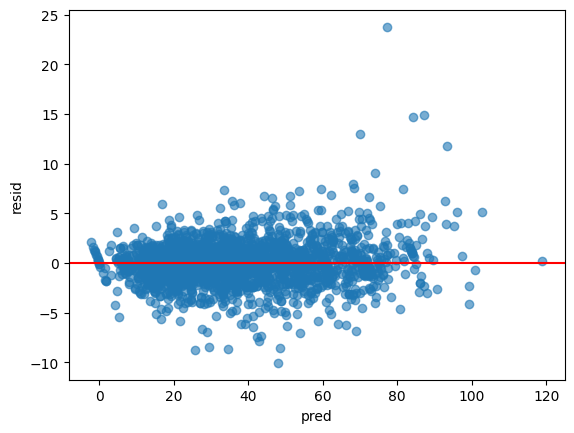

In [10]:
# fit final model (use best estimator if from RandomizedSearch)
model = rs.best_estimator_ if 'rs' in globals() else xgb_pipe
model.fit(X, y)

# get OHE feature names & importances
ohe = model.named_steps['pre'].named_transformers_['cat']
cat_names = ohe.get_feature_names_out(cat_cols)
feature_names = list(cat_names) + num_cols
importances = model.named_steps['model'].feature_importances_
fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(fi.head(20))

# residual plot
pred = model.predict(X)
resid = y - pred
plt.scatter(pred, resid, alpha=0.6); plt.axhline(0, color='r'); plt.xlabel('pred'); plt.ylabel('resid'); plt.show()


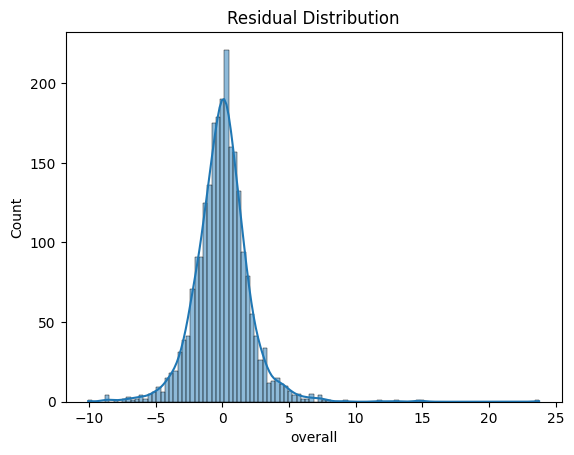

In [12]:
import seaborn as sns

sns.histplot(resid, kde=True)
plt.title("Residual Distribution")
plt.show()

In [13]:
import joblib
joblib.dump(model, "xgb_final_model.pkl")

['xgb_final_model.pkl']

In [14]:
# Example: new data
X_new = pd.DataFrame({
    'route_id': ['ROUTE1', 'ROUTE2'],
    'stop_id': ['S1', 'S3'],
    'day_of_week': ['Monday', 'Friday'],
    'route_stop': ['ROUTE1_S1', 'ROUTE2_S3'],
    'hour_sin': [np.sin(2*np.pi*10/24), np.sin(2*np.pi*15/24)],
    'hour_cos': [np.cos(2*np.pi*10/24), np.cos(2*np.pi*15/24)],
    'is_weekend': [0, 0]
})


In [16]:
predictions = model.predict(X_new)
predictions


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([76.31084 , 39.704033], dtype=float32)

In [21]:
import numpy as np
import pandas as pd

def suggest_fleet(model, trips_df, bus_capacity=45):
    """
    Suggest fleet allocation based on predicted ridership.

    Parameters:
        model: Trained XGB/Pipeline model
        trips_df: pd.DataFrame with columns:
                  ['route_id','stop_id','day_of_week','hour']
        bus_capacity: capacity per vehicle (default=40)

    Returns:
        trips_df with predicted ridership and number of vehicles
    """
    df = trips_df.copy()

    # Feature engineering
    df['hour_sin'] = np.sin(2*np.pi*df['hour']/24)
    df['hour_cos'] = np.cos(2*np.pi*df['hour']/24)
    df['route_stop'] = df['route_id'].astype(str) + '_' + df['stop_id'].astype(str)
    df['is_weekend'] = df['day_of_week'].isin(['Saturday','Sunday']).astype(int)

    # Select features
    cat_cols = ['route_id','stop_id','day_of_week','route_stop']
    num_cols = ['hour_sin','hour_cos','is_weekend']
    X_new = df[cat_cols + num_cols].fillna(0)

    # Predict ridership
    df['pred_overall'] = model.predict(X_new)

    # Suggest number of buses/vehicles
    df['suggested_vehicles'] = np.ceil(df['pred_overall'] / bus_capacity).astype(int)

    return df


In [23]:
trips = pd.DataFrame({
    'route_id': ['ROUTE1', 'ROUTE2'],
    'stop_id': ['S1', 'S3'],
    'day_of_week': ['Monday', 'Friday'],
    'hour': [10, 15]
})

fleet_df = suggest_fleet(model, trips, bus_capacity=40)
print(fleet_df)


  route_id stop_id day_of_week  hour  hour_sin  hour_cos route_stop  \
0   ROUTE1      S1      Monday    10  0.500000 -0.866025  ROUTE1_S1   
1   ROUTE2      S3      Friday    15 -0.707107 -0.707107  ROUTE2_S3   

   is_weekend  pred_overall  suggested_vehicles  
0           0     76.310837                   2  
1           0     39.704033                   1  


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
